# 환경 세팅

In [1]:
# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※강의자료가 위치에 있는 경로 확인)
import os
os.chdir('/content/drive/MyDrive/내배캠 실습/2. 파이썬 기초 프로젝트/')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/내배캠 실습/2. 파이썬 기초 프로젝트'

In [2]:
!apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [3]:
!rm -rf /root/.cache/matplotlib/*

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name
# 실행 후 세션 재시작하기 필수

In [6]:
# 마이너스 기호 처리
mpl.rcParams['axes.unicode_minus'] = False

# 라이브러리, 데이터 로드

In [7]:
# 라이브러리 로드
import pandas as pd
import seaborn as sns

# 불필요한 경고문 생략(선택)
import warnings
warnings.filterwarnings('ignore')

# 모든 컬럼 출력설정(선택)
pd.set_option('display.max_columns', None)



# 데이터 확인

In [8]:
#  데이터 로드
df = pd.read_csv('epl_202122.csv')
df

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,22/05/2022,16:00,Crystal Palace,Man United,1,0,H,1,0,H,M Atkinson,6,10,3,4,12,22,3,6,2,4,0,0
376,22/05/2022,16:00,Leicester,Southampton,4,1,H,0,0,D,J Moss,12,7,6,2,10,5,3,3,0,1,0,0
377,22/05/2022,16:00,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,29,7,8,5,6,3,5,3,1,0,0,0
378,22/05/2022,16:00,Man City,Aston Villa,3,2,H,0,1,A,M Oliver,24,4,5,2,5,11,13,1,0,1,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   Time      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

# 1. Basic EDA

In [25]:
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0


In [26]:
# 몇 팀?
df['HomeTeam'].unique()

array(['Brentford', 'Man United', 'Burnley', 'Chelsea', 'Everton',
       'Leicester', 'Watford', 'Norwich', 'Newcastle', 'Tottenham',
       'Liverpool', 'Aston Villa', 'Crystal Palace', 'Leeds', 'Man City',
       'Brighton', 'Southampton', 'Wolves', 'Arsenal', 'West Ham'],
      dtype=object)

In [27]:
len(df['HomeTeam'].unique())

20

In [28]:
# 몇 경기? 비긴 경기는?
df['FTR'].value_counts()

,count
FTR,
H,163
A,129
D,88


In [29]:
# 평균 점수 차
df['FTHG'].mean()

1.513157894736842

In [30]:
df['FTAG'].mean()

1.305263157894737

In [31]:
(df['FTHG'] - df['FTAG']).mean()

0.20789473684210527

In [32]:
# 한 경기 평균 슈팅
(df['HS'] + df['AS']).mean()

25.58421052631579

In [33]:
# 한 경기 평균 유효 슈팅
(df['HST'] + df['AST']).mean()

8.821052631578947

In [34]:
# 한 경기 평균 득점
(df['FTHG'] + df['FTAG']).mean()

2.818421052631579

In [35]:
# 평균 파울, 옐로 카드, 레드 카드
a = (df['HF'] + df['AF']).mean()
b = (df['HY'] + df['AY']).mean()
c = (df['HR'] + df['AR']).mean()

print(f'한 경기 당 평균 파울 개수: {a} \n한 경기 당 평균 옐로 카드 개수: {b}\n한 경기 당 평균 레드 카드 개수: {c}')

한 경기 당 평균 파울 개수: 20.21315789473684 
한 경기 당 평균 옐로 카드 개수: 3.3973684210526316
한 경기 당 평균 레드 카드 개수: 0.11315789473684211


In [36]:
# 후반전에 전반전 결과가 뒤집한 경기
df[df['HTR'] != df['FTR']]
# 155경기

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0
8,15/08/2021,14:00,Newcastle,West Ham,2,4,A,2,1,H,M Atkinson,17,8,3,9,4,3,7,6,1,0,0,0
9,15/08/2021,16:30,Tottenham,Man City,1,0,H,0,0,D,A Taylor,13,18,3,4,11,8,3,11,2,1,0,0
16,22/08/2021,14:00,Southampton,Man United,1,1,D,1,0,H,C Pawson,8,15,3,4,12,10,7,7,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,22/05/2022,16:00,Brentford,Leeds,1,2,A,0,0,D,P Tierney,14,14,5,6,11,13,3,2,2,1,1,0
372,22/05/2022,16:00,Brighton,West Ham,3,1,H,0,1,A,K Friend,18,7,7,2,9,9,5,6,1,1,0,0
376,22/05/2022,16:00,Leicester,Southampton,4,1,H,0,0,D,J Moss,12,7,6,2,10,5,3,3,0,1,0,0
377,22/05/2022,16:00,Liverpool,Wolves,3,1,H,1,1,D,A Taylor,29,7,8,5,6,3,5,3,1,0,0,0


# 2. 전후반 득점 비율 비교 + 승률 → 버블차트
전반 득점 → HTHG / HTAG

후반 득점 → **홈 팀**: FTHG - HTHG / **어웨이**: FTAG - HTAG

In [37]:
df_goals = df[['HomeTeam', 'AwayTeam', 'HTHG', 'HTAG', 'FTHG', 'FTAG', 'HTR', 'FTR']]

0. 전처리


 1) 필요한 컬럼만 가져오기

 2) 계산 편의를 위해 후반 득점 컬럼 second 생성

In [38]:
df_goals

,HomeTeam,AwayTeam,HTHG,HTAG,FTHG,FTAG,HTR,FTR
0,Brentford,Arsenal,1,0,2,0,H,H
1,Man United,Leeds,1,0,5,1,H,H
2,Burnley,Brighton,1,0,1,2,H,A
3,Chelsea,Crystal Palace,2,0,3,0,H,H
4,Everton,Southampton,0,1,3,1,A,H
...,...,...,...,...,...,...,...,...
375,Crystal Palace,Man United,1,0,1,0,H,H
376,Leicester,Southampton,0,0,4,1,D,H
377,Liverpool,Wolves,1,1,3,1,D,H
378,Man City,Aston Villa,0,1,3,2,A,H


In [39]:
df_goals['HomeSecond'] = df_goals['FTHG'] - df_goals['HTHG']
df_goals['AwaySecond'] = df_goals['FTAG'] - df_goals['HTAG']

In [40]:
df_goals

,HomeTeam,AwayTeam,HTHG,HTAG,FTHG,FTAG,HTR,FTR,HomeSecond,AwaySecond
0,Brentford,Arsenal,1,0,2,0,H,H,1,0
1,Man United,Leeds,1,0,5,1,H,H,4,1
2,Burnley,Brighton,1,0,1,2,H,A,0,2
3,Chelsea,Crystal Palace,2,0,3,0,H,H,1,0
4,Everton,Southampton,0,1,3,1,A,H,3,0
...,...,...,...,...,...,...,...,...,...,...
375,Crystal Palace,Man United,1,0,1,0,H,H,0,0
376,Leicester,Southampton,0,0,4,1,D,H,4,1
377,Liverpool,Wolves,1,1,3,1,D,H,2,0
378,Man City,Aston Villa,0,1,3,2,A,H,3,1


1) 전체 전후반 골 분포

In [41]:
# 전반전 전체 골
first_home = df_goals['HTHG'].sum()
first_away = df_goals['HTAG'].sum()
first_total = df_goals['HTHG'].sum() + df_goals['HTAG'].sum()
print(f'전반전 홈 팀의 골 개수: {first_home}')
print(f'전반전 원정 팀의 골 개수: {first_away}')
print(f'전반전 전체 골 개수: {first_total}')

전반전 홈 팀의 골 개수: 259
전반전 원정 팀의 골 개수: 224
전반전 전체 골 개수: 483


In [42]:
# 후반전 전체 골
second_home = df_goals['HomeSecond'].sum()
second_away = df_goals['AwaySecond'].sum()
second_total = df_goals['HomeSecond'].sum() + df_goals['AwaySecond'].sum()
print(f'후반전 홈 팀의 골 개수: {second_home}')
print(f'후반전 원정 팀의 골 개수: {second_away}')
print(f'후반전 전체 골 개수: {second_total}')

후반전 홈 팀의 골 개수: 316
후반전 원정 팀의 골 개수: 272
후반전 전체 골 개수: 588


In [43]:
first_second_goals = pd.DataFrame({
    'Half': ['first', 'first', 'second', 'second'],
    'H/A': ['Home', 'Away', 'Home', 'Away'],
    'Goals': [first_home, first_away, second_home, second_away]
})

first_second_goals

,Half,H/A,Goals
0,first,Home,259
1,first,Away,224
2,second,Home,316
3,second,Away,272


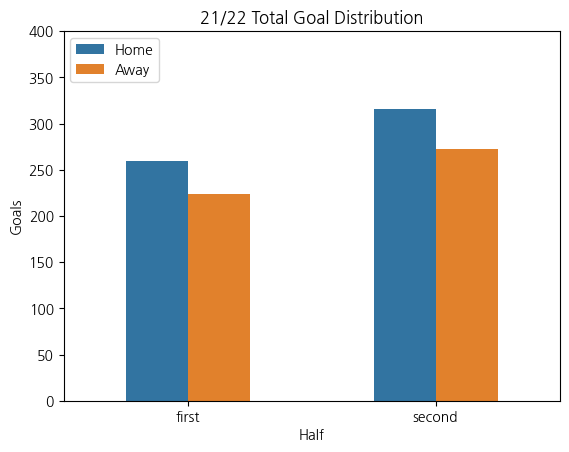

In [44]:
sns.barplot(x = 'Half', y = 'Goals', hue = 'H/A', data = first_second_goals, width = 0.5,)
plt.ylim(0, 400)
plt.legend(loc = 'upper left')
plt.title('21/22 Total Goal Distribution')
plt.show()

## 2) 구단 별 전후반 득점 비율

In [45]:
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0


In [46]:
team_list = list(df['HomeTeam'].unique())
team_list

['Brentford',
 'Man United',
 'Burnley',
 'Chelsea',
 'Everton',
 'Leicester',
 'Watford',
 'Norwich',
 'Newcastle',
 'Tottenham',
 'Liverpool',
 'Aston Villa',
 'Crystal Palace',
 'Leeds',
 'Man City',
 'Brighton',
 'Southampton',
 'Wolves',
 'Arsenal',
 'West Ham']

In [47]:
goals_per_team = {team: [0, 0] for team in team_list}
goals_per_team

{'Brentford': [0, 0],
 'Man United': [0, 0],
 'Burnley': [0, 0],
 'Chelsea': [0, 0],
 'Everton': [0, 0],
 'Leicester': [0, 0],
 'Watford': [0, 0],
 'Norwich': [0, 0],
 'Newcastle': [0, 0],
 'Tottenham': [0, 0],
 'Liverpool': [0, 0],
 'Aston Villa': [0, 0],
 'Crystal Palace': [0, 0],
 'Leeds': [0, 0],
 'Man City': [0, 0],
 'Brighton': [0, 0],
 'Southampton': [0, 0],
 'Wolves': [0, 0],
 'Arsenal': [0, 0],
 'West Ham': [0, 0]}

In [48]:
def goal_check(df, dict):
    for index in df.index:
        # home team
        hometeam = df.loc[index, 'HomeTeam']
        dict[hometeam][0] += df.loc[index, 'HTHG']
        dict[hometeam][1] += df.loc[index, 'HomeSecond']
        # away team
        awayteam = df.loc[index, 'AwayTeam']
        dict[awayteam][0] += df.loc[index, 'HTAG']
        dict[awayteam][1] += df.loc[index, 'AwaySecond']

In [49]:
goal_check(df_goals, goals_per_team)

In [50]:
goals_per_team

{'Brentford': [16, 32],
 'Man United': [22, 35],
 'Burnley': [17, 17],
 'Chelsea': [34, 42],
 'Everton': [16, 27],
 'Leicester': [27, 35],
 'Watford': [17, 17],
 'Norwich': [11, 12],
 'Newcastle': [25, 19],
 'Tottenham': [33, 36],
 'Liverpool': [44, 50],
 'Aston Villa': [21, 31],
 'Crystal Palace': [21, 29],
 'Leeds': [16, 26],
 'Man City': [45, 54],
 'Brighton': [16, 26],
 'Southampton': [24, 19],
 'Wolves': [18, 20],
 'Arsenal': [33, 28],
 'West Ham': [27, 33]}

In [51]:
first_goals = [v[0] for v in goals_per_team.values()]
second_goals = [v[1] for v in goals_per_team.values()]

In [52]:
sum(second_goals)

588

In [53]:
df_goals_per_team = pd.DataFrame({
    'team': team_list,
    'first_half': first_goals,
    'second_half': second_goals
})

In [54]:
df_goals_per_team

,team,first_half,second_half
0,Brentford,16,32
1,Man United,22,35
2,Burnley,17,17
3,Chelsea,34,42
4,Everton,16,27
5,Leicester,27,35
6,Watford,17,17
7,Norwich,11,12
8,Newcastle,25,19
9,Tottenham,33,36


### 승점 계산하기

In [55]:
df_goals.head()

,HomeTeam,AwayTeam,HTHG,HTAG,FTHG,FTAG,HTR,FTR,HomeSecond,AwaySecond
0,Brentford,Arsenal,1,0,2,0,H,H,1,0
1,Man United,Leeds,1,0,5,1,H,H,4,1
2,Burnley,Brighton,1,0,1,2,H,A,0,2
3,Chelsea,Crystal Palace,2,0,3,0,H,H,1,0
4,Everton,Southampton,0,1,3,1,A,H,3,0


In [56]:
point_dict = {team: 0 for team in team_list}
point_dict

{'Brentford': 0,
 'Man United': 0,
 'Burnley': 0,
 'Chelsea': 0,
 'Everton': 0,
 'Leicester': 0,
 'Watford': 0,
 'Norwich': 0,
 'Newcastle': 0,
 'Tottenham': 0,
 'Liverpool': 0,
 'Aston Villa': 0,
 'Crystal Palace': 0,
 'Leeds': 0,
 'Man City': 0,
 'Brighton': 0,
 'Southampton': 0,
 'Wolves': 0,
 'Arsenal': 0,
 'West Ham': 0}

In [57]:
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0


In [58]:
def point_check(df, dict):
    for index in df.index:
        if df.loc[index, 'FTR'] == 'H':
            dict[df.loc[index, 'HomeTeam']] += 3
        elif df.loc[index, 'FTR'] == 'A':
            dict[df.loc[index, 'AwayTeam']] += 3
        else:
            dict[df.loc[index, 'HomeTeam']] += 1
            dict[df.loc[index, 'AwayTeam']] += 1


In [59]:
point_check(df, point_dict)
point_dict

{'Brentford': 46,
 'Man United': 58,
 'Burnley': 35,
 'Chelsea': 74,
 'Everton': 39,
 'Leicester': 52,
 'Watford': 23,
 'Norwich': 22,
 'Newcastle': 49,
 'Tottenham': 71,
 'Liverpool': 92,
 'Aston Villa': 45,
 'Crystal Palace': 48,
 'Leeds': 38,
 'Man City': 93,
 'Brighton': 51,
 'Southampton': 40,
 'Wolves': 51,
 'Arsenal': 69,
 'West Ham': 56}

In [60]:
df_point = pd.DataFrame({
    'team': team_list,
    'points': [v for v in point_dict.values()]
})

df_point

,team,points
0,Brentford,46
1,Man United,58
2,Burnley,35
3,Chelsea,74
4,Everton,39
5,Leicester,52
6,Watford,23
7,Norwich,22
8,Newcastle,49
9,Tottenham,71


### df_goals_per_team & df_point merge

In [61]:
df_goal_point = pd.merge(df_goals_per_team, df_point, on = 'team', how = 'left')
df_goal_point

,team,first_half,second_half,points
0,Brentford,16,32,46
1,Man United,22,35,58
2,Burnley,17,17,35
3,Chelsea,34,42,74
4,Everton,16,27,39
5,Leicester,27,35,52
6,Watford,17,17,23
7,Norwich,11,12,22
8,Newcastle,25,19,49
9,Tottenham,33,36,71


### 시각화

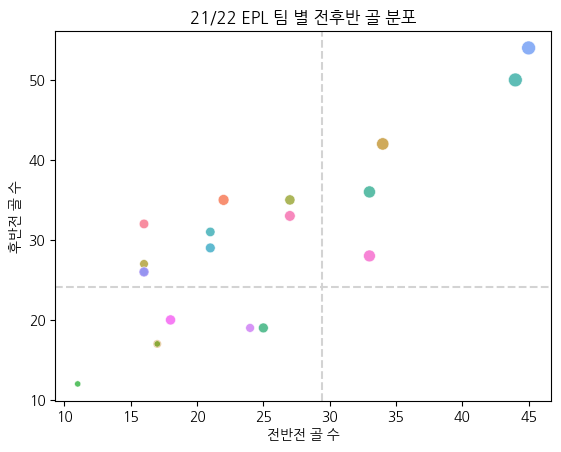

In [62]:
sns.scatterplot(x = 'first_half',
                y = 'second_half',
                hue = 'team',
                size = 'points',
                sizes = (20, 100),
                alpha = 0.8,
                legend = False,
                data = df_goal_point)
plt.xlabel('전반전 골 수')
plt.ylabel('후반전 골 수')
plt.title('21/22 EPL 팀 별 전후반 골 분포')
plt.axhline(df_goal_point['first_half'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.axvline(df_goal_point['second_half'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
#plt.legend(loc = 'center right', bbox_to_anchor=(1.7, 0.5), ncol = 2)
plt.show()

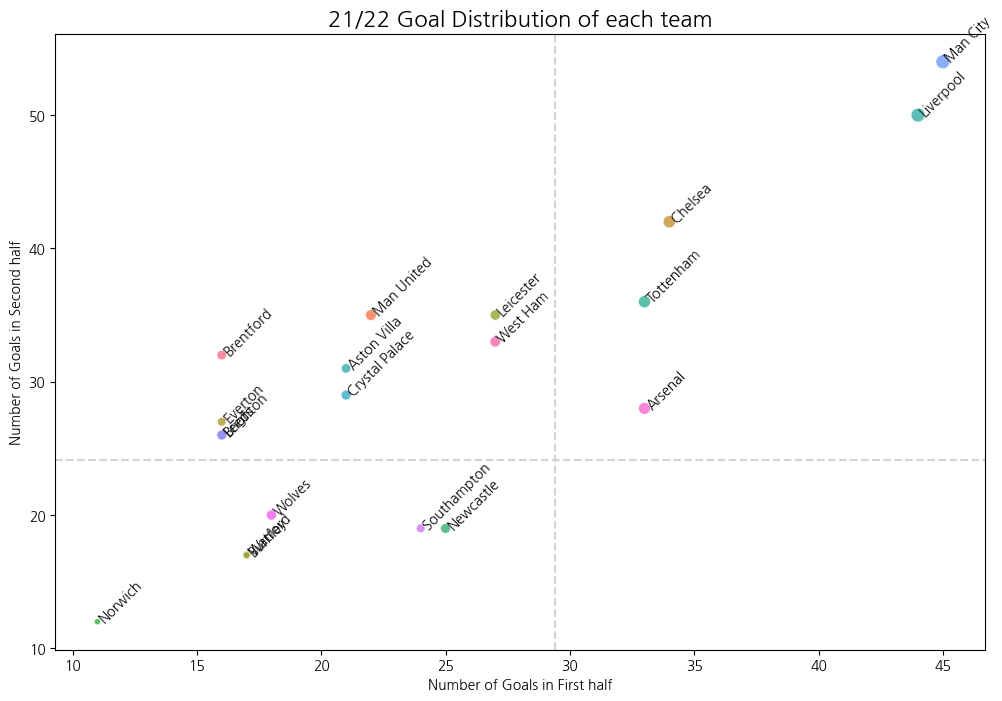

In [63]:
plt.figure(figsize = (12, 8))
# plt.scatter(team_stats['Conversion_Rate'],
#             team_stats['Clean_Sheet_Rate'],
#             c = team_stats['Clean_Sheet_Rate'],
#             cmap = 'Wistia',
#             alpha = 0.9)
sns.scatterplot(x = 'first_half',
                y = 'second_half',
                hue = 'team',
                size = 'points',
                sizes = (20, 100),
                alpha = 0.8,
                legend = False,
                data = df_goal_point)
#plt.colorbar(label = 'Clean Sheet Rate (%)')
plt.xlabel('Number of Goals in First half')
plt.ylabel('Number of Goals in Second half')
plt.title('21/22 Goal Distribution of each team', fontsize = 16)

for x, y, team in zip(df_goal_point['first_half'], df_goal_point['second_half'], df_goal_point['team']):
    plt.text(
        x, y, team,
        rotation = 45,
        fontsize=10,
        ha='left'
    )

plt.axhline(df_goal_point['first_half'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.axvline(df_goal_point['second_half'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
# plt.legend(loc='upper left')
# plt.grid(alpha = 0.5)
# plt.tight_layout()

# 3. 홈 경기 승률 , 원정 경기 승률 비교

In [64]:
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0


In [65]:
winning_case = {team: [0, 0, 0, 0] for team in team_list} # 홈승, 홈패, 원정승, 원정패 순
winning_case

{'Brentford': [0, 0, 0, 0],
 'Man United': [0, 0, 0, 0],
 'Burnley': [0, 0, 0, 0],
 'Chelsea': [0, 0, 0, 0],
 'Everton': [0, 0, 0, 0],
 'Leicester': [0, 0, 0, 0],
 'Watford': [0, 0, 0, 0],
 'Norwich': [0, 0, 0, 0],
 'Newcastle': [0, 0, 0, 0],
 'Tottenham': [0, 0, 0, 0],
 'Liverpool': [0, 0, 0, 0],
 'Aston Villa': [0, 0, 0, 0],
 'Crystal Palace': [0, 0, 0, 0],
 'Leeds': [0, 0, 0, 0],
 'Man City': [0, 0, 0, 0],
 'Brighton': [0, 0, 0, 0],
 'Southampton': [0, 0, 0, 0],
 'Wolves': [0, 0, 0, 0],
 'Arsenal': [0, 0, 0, 0],
 'West Ham': [0, 0, 0, 0]}

In [66]:
# 홈/원정 우승 경기 수 계산
def check_homeaway(df, dict):
    for index in df.index:
        if df.loc[index, 'FTR'] == 'H':
            dict[df.loc[index, 'HomeTeam']][0] += 1
            dict[df.loc[index, 'AwayTeam']][3] += 1
        elif df.loc[index, 'FTR'] == 'A':
            dict[df.loc[index, 'HomeTeam']][1] += 1
            dict[df.loc[index, 'AwayTeam']][2] += 1
        else:
            continue

In [67]:
check_homeaway(df, winning_case)

In [68]:
winning_case

{'Brentford': [7, 9, 6, 9],
 'Man United': [10, 4, 6, 8],
 'Burnley': [5, 8, 2, 9],
 'Chelsea': [9, 3, 12, 3],
 'Everton': [9, 8, 2, 13],
 'Leicester': [10, 5, 4, 9],
 'Watford': [2, 15, 4, 12],
 'Norwich': [3, 13, 2, 13],
 'Newcastle': [8, 5, 5, 10],
 'Tottenham': [13, 5, 9, 6],
 'Liverpool': [15, 0, 13, 2],
 'Aston Villa': [6, 8, 7, 11],
 'Crystal Palace': [7, 4, 4, 8],
 'Leeds': [4, 9, 5, 9],
 'Man City': [15, 2, 14, 1],
 'Brighton': [5, 7, 7, 4],
 'Southampton': [6, 6, 3, 10],
 'Wolves': [7, 9, 8, 8],
 'Arsenal': [13, 4, 9, 9],
 'West Ham': [9, 5, 7, 9]}

In [69]:
# 홈 원정 승패 수 구하는 함수
df_homeaway_win = pd.DataFrame({
    'team': team_list,
    'home win': [v[0] for v in winning_case.values()],
    'home lose': [v[1] for v in winning_case.values()],
    'away win': [v[2] for v in winning_case.values()],
    'away lose': [v[3] for v in winning_case.values()],
})

df_homeaway_win

,team,home win,home lose,away win,away lose
0,Brentford,7,9,6,9
1,Man United,10,4,6,8
2,Burnley,5,8,2,9
3,Chelsea,9,3,12,3
4,Everton,9,8,2,13
5,Leicester,10,5,4,9
6,Watford,2,15,4,12
7,Norwich,3,13,2,13
8,Newcastle,8,5,5,10
9,Tottenham,13,5,9,6


In [70]:
# 홈 승, 홈 패, 원정 승, 원정 패 정보 추가
df_homeaway_win['total win'] = df_homeaway_win['home win'] + df_homeaway_win['away win']
df_homeaway_win['total lose'] = df_homeaway_win['home lose'] + df_homeaway_win['away lose']
df_homeaway_win['total home'] = df_homeaway_win['home win'] + df_homeaway_win['home lose']
df_homeaway_win['total away'] = df_homeaway_win['away win'] + df_homeaway_win['away lose']

df_homeaway_win['home win/total win'] = round(df_homeaway_win['home win'] / df_homeaway_win['total win'], 2)

df_homeaway_win

,team,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win
0,Brentford,7,9,6,9,13,18,16,15,0.54
1,Man United,10,4,6,8,16,12,14,14,0.62
2,Burnley,5,8,2,9,7,17,13,11,0.71
3,Chelsea,9,3,12,3,21,6,12,15,0.43
4,Everton,9,8,2,13,11,21,17,15,0.82
5,Leicester,10,5,4,9,14,14,15,13,0.71
6,Watford,2,15,4,12,6,27,17,16,0.33
7,Norwich,3,13,2,13,5,26,16,15,0.60
8,Newcastle,8,5,5,10,13,15,13,15,0.62
9,Tottenham,13,5,9,6,22,11,18,15,0.59


In [71]:
# merge with df_point -> 승점 컬럼 추가
df_win_and_point = pd.merge(df_homeaway_win, df_point, on = 'team', how = 'inner')
df_win_and_point

,team,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,points
0,Brentford,7,9,6,9,13,18,16,15,0.54,46
1,Man United,10,4,6,8,16,12,14,14,0.62,58
2,Burnley,5,8,2,9,7,17,13,11,0.71,35
3,Chelsea,9,3,12,3,21,6,12,15,0.43,74
4,Everton,9,8,2,13,11,21,17,15,0.82,39
5,Leicester,10,5,4,9,14,14,15,13,0.71,52
6,Watford,2,15,4,12,6,27,17,16,0.33,23
7,Norwich,3,13,2,13,5,26,16,15,0.60,22
8,Newcastle,8,5,5,10,13,15,13,15,0.62,49
9,Tottenham,13,5,9,6,22,11,18,15,0.59,71


### 시각화

1. 전체 승리 중 홈 승리 비율

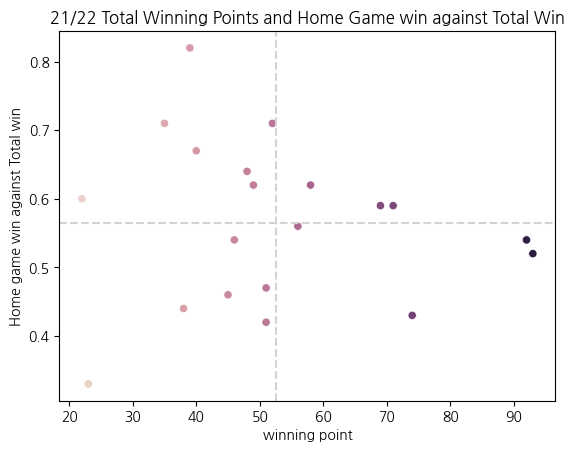

In [72]:
sns.scatterplot(x = 'points',
                y = 'home win/total win',
                hue = 'points',
                legend = False,
                data = df_win_and_point)
plt.xlabel('winning point')
plt.ylabel('Home game win against Total win')
plt.title('21/22 Total Winning Points and Home Game win against Total Win')
plt.axvline(df_win_and_point['points'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.axhline(df_win_and_point['home win/total win'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
#plt.legend(loc = 'center right', bbox_to_anchor=(1.65, 0.5), ncol = 2)
plt.show()

2. 전체 홈 경기 중 이긴 홈 경기 비율

In [73]:
df_win_and_point.head()

,team,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,points
0,Brentford,7,9,6,9,13,18,16,15,0.54,46
1,Man United,10,4,6,8,16,12,14,14,0.62,58
2,Burnley,5,8,2,9,7,17,13,11,0.71,35
3,Chelsea,9,3,12,3,21,6,12,15,0.43,74
4,Everton,9,8,2,13,11,21,17,15,0.82,39


In [74]:
df_win_and_point['home win/total home'] = round(df_win_and_point['home win'] / 19, 2)
df_win_and_point['away win/total away'] = round(df_win_and_point['away win'] / 19, 2)
df_win_and_point.head()

,team,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,points,home win/total home,away win/total away
0,Brentford,7,9,6,9,13,18,16,15,0.54,46,0.37,0.32
1,Man United,10,4,6,8,16,12,14,14,0.62,58,0.53,0.32
2,Burnley,5,8,2,9,7,17,13,11,0.71,35,0.26,0.11
3,Chelsea,9,3,12,3,21,6,12,15,0.43,74,0.47,0.63
4,Everton,9,8,2,13,11,21,17,15,0.82,39,0.47,0.11


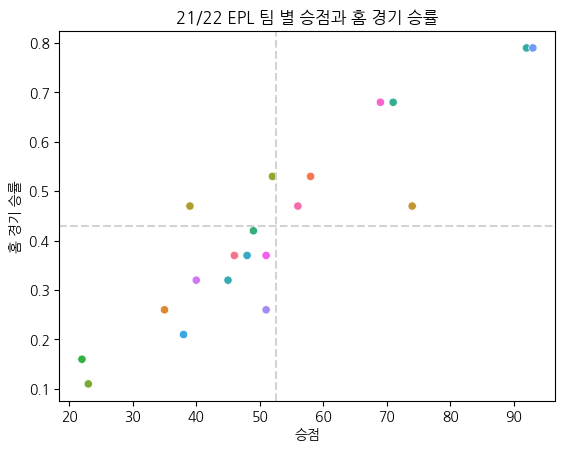

In [75]:
sns.scatterplot(x = 'points',
                y = 'home win/total home',
                hue = 'team',
                legend = False,
                data = df_win_and_point)
plt.xlabel('승점')
plt.ylabel('홈 경기 승률')
plt.title('21/22 EPL 팀 별 승점과 홈 경기 승률')
plt.axvline(df_win_and_point['points'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.axhline(df_win_and_point['home win/total home'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
#plt.legend(loc = 'center right', bbox_to_anchor=(1.65, 0.5), ncol = 2)
plt.show()

3. 홈 승률과 원정 승률 비교

In [76]:
!pip install adjustText

In [77]:
from adjustText import adjust_text

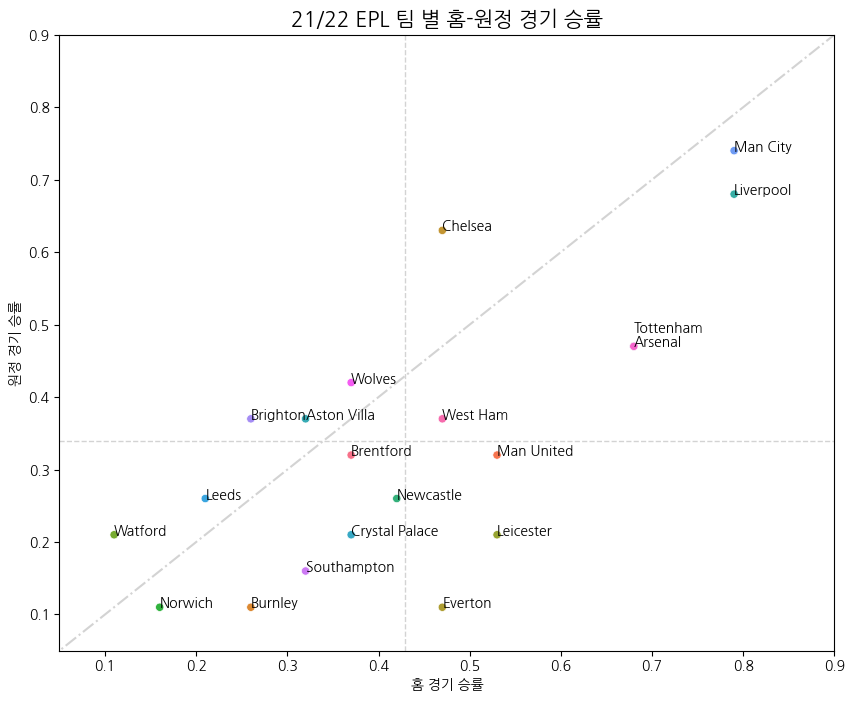

In [78]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'home win/total home',
                y = 'away win/total away',
                hue = 'team',
                legend = False,
                data = df_win_and_point)
plt.xlabel('홈 경기 승률')
plt.ylabel('원정 경기 승률')
plt.title('21/22 EPL 팀 별 홈-원정 경기 승률', fontsize = 15)
plt.axvline(df_win_and_point['home win/total home'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1)
plt.axhline(df_win_and_point['away win/total away'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1)
plt.xlim((0.05, 0.9))
plt.ylim((0.05, 0.9))
plt.plot([0, 0.2, 0.4, 0.6, 0.8, 0.9], [0, 0.2, 0.4, 0.6, 0.8, 0.9], color = 'lightgray', linestyle = '-.', linewidth = 1.5)
#plt.legend(loc = 'center right', bbox_to_anchor=(1.65, 0.5), ncol = 2)

for x, y, team in zip(df_win_and_point['home win/total home'], df_win_and_point['away win/total away'], df_win_and_point['team']):
    if team == 'Tottenham':
        plt.text(
        x, y+0.02, team,
        #rotation = 45,
        fontsize=10,
        ha='left'
    )
    else:
        plt.text(
            x, y, team,
            #rotation = 45,
            fontsize=10,
            ha='left'
        )
plt.show()

# 4. 팀 별 데이터 프레임 만들기

### 생성 데이터 프레임 목록

In [79]:
# 팀 별 전후반 득점
df_goals_per_team.head()

,team,first_half,second_half
0,Brentford,16,32
1,Man United,22,35
2,Burnley,17,17
3,Chelsea,34,42
4,Everton,16,27


In [80]:
# 팀 별 승점
df_point.head()

,team,points
0,Brentford,46
1,Man United,58
2,Burnley,35
3,Chelsea,74
4,Everton,39


In [81]:
# 위 두 개 조인
df_goal_point.head()

,team,first_half,second_half,points
0,Brentford,16,32,46
1,Man United,22,35,58
2,Burnley,17,17,35
3,Chelsea,34,42,74
4,Everton,16,27,39


In [82]:
# 팀 별 원정 승패 및 전체 승패 수, 홈 승 비율
df_homeaway_win.head()

,team,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win
0,Brentford,7,9,6,9,13,18,16,15,0.54
1,Man United,10,4,6,8,16,12,14,14,0.62
2,Burnley,5,8,2,9,7,17,13,11,0.71
3,Chelsea,9,3,12,3,21,6,12,15,0.43
4,Everton,9,8,2,13,11,21,17,15,0.82


In [83]:
# 팀 별 원정 승패 및 전체 승패 수, 홈 승 비율과 총 승점
df_win_and_point.head()

,team,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,points,home win/total home,away win/total away
0,Brentford,7,9,6,9,13,18,16,15,0.54,46,0.37,0.32
1,Man United,10,4,6,8,16,12,14,14,0.62,58,0.53,0.32
2,Burnley,5,8,2,9,7,17,13,11,0.71,35,0.26,0.11
3,Chelsea,9,3,12,3,21,6,12,15,0.43,74,0.47,0.63
4,Everton,9,8,2,13,11,21,17,15,0.82,39,0.47,0.11


In [84]:
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0


[ 더 추가할 컬럼 ]
- 슈팅 HS/AS
- 유효슈팅 HST/AST
- 파울 HF/AF
- 옐로카드 HY/AY
- 레드카드 HR/AR

In [85]:
temp_dict = {team: [0] * 6 for team in team_list} # 슈팅, 유효슈팅, 파울, 옐로카드, 레드카드, 코너킥 순
temp_dict

{'Brentford': [0, 0, 0, 0, 0, 0],
 'Man United': [0, 0, 0, 0, 0, 0],
 'Burnley': [0, 0, 0, 0, 0, 0],
 'Chelsea': [0, 0, 0, 0, 0, 0],
 'Everton': [0, 0, 0, 0, 0, 0],
 'Leicester': [0, 0, 0, 0, 0, 0],
 'Watford': [0, 0, 0, 0, 0, 0],
 'Norwich': [0, 0, 0, 0, 0, 0],
 'Newcastle': [0, 0, 0, 0, 0, 0],
 'Tottenham': [0, 0, 0, 0, 0, 0],
 'Liverpool': [0, 0, 0, 0, 0, 0],
 'Aston Villa': [0, 0, 0, 0, 0, 0],
 'Crystal Palace': [0, 0, 0, 0, 0, 0],
 'Leeds': [0, 0, 0, 0, 0, 0],
 'Man City': [0, 0, 0, 0, 0, 0],
 'Brighton': [0, 0, 0, 0, 0, 0],
 'Southampton': [0, 0, 0, 0, 0, 0],
 'Wolves': [0, 0, 0, 0, 0, 0],
 'Arsenal': [0, 0, 0, 0, 0, 0],
 'West Ham': [0, 0, 0, 0, 0, 0]}

In [86]:
def check_per_team(df, dict):
    for index in df.index:
        home = df.loc[index, 'HomeTeam']
        away = df.loc[index, 'AwayTeam']

        dict[home][0] += df.loc[index, 'HS']
        dict[home][1] += df.loc[index, 'HST']
        dict[home][2] += df.loc[index, 'HF']
        dict[home][3] += df.loc[index, 'HY']
        dict[home][4] += df.loc[index, 'HR']
        dict[home][5] += df.loc[index, 'HC']

        dict[away][0] += df.loc[index, 'AS']
        dict[away][1] += df.loc[index, 'AST']
        dict[away][2] += df.loc[index, 'AF']
        dict[away][3] += df.loc[index, 'AY']
        dict[away][4] += df.loc[index, 'AR']
        dict[away][5] += df.loc[index, 'AC']

In [87]:
check_per_team(df, temp_dict)

In [88]:
temp_dict

{'Brentford': [442, 154, 371, 61, 3, 159],
 'Man United': [508, 187, 395, 75, 2, 199],
 'Burnley': [407, 125, 394, 68, 2, 184],
 'Chelsea': [592, 211, 409, 63, 1, 242],
 'Everton': [438, 138, 368, 76, 6, 161],
 'Leicester': [435, 169, 356, 54, 1, 185],
 'Watford': [396, 127, 440, 57, 3, 162],
 'Norwich': [374, 109, 356, 55, 2, 165],
 'Newcastle': [448, 148, 391, 79, 1, 160],
 'Tottenham': [491, 198, 386, 67, 1, 195],
 'Liverpool': [730, 256, 363, 50, 1, 285],
 'Aston Villa': [454, 162, 401, 77, 2, 196],
 'Crystal Palace': [412, 147, 415, 67, 1, 176],
 'Leeds': [485, 154, 469, 100, 3, 171],
 'Man City': [715, 254, 320, 42, 1, 317],
 'Brighton': [490, 152, 393, 71, 2, 202],
 'Southampton': [482, 170, 402, 63, 2, 234],
 'Wolves': [402, 136, 365, 59, 2, 168],
 'Arsenal': [588, 197, 363, 60, 4, 209],
 'West Ham': [433, 158, 324, 47, 3, 191]}

In [89]:
df_team_index = pd.DataFrame({
    'team': team_list,
    'Shots':[v[0] for v in temp_dict.values()],
    'Shot on Target': [v[1] for v in temp_dict.values()],
    'Foul': [v[2] for v in temp_dict.values()],
    'Yellow card': [v[3] for v in temp_dict.values()],
    'Red card': [v[4] for v in temp_dict.values()],
    'Corner Kick': [v[5] for v in temp_dict.values()]
})

df_team_index

,team,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick
0,Brentford,442,154,371,61,3,159
1,Man United,508,187,395,75,2,199
2,Burnley,407,125,394,68,2,184
3,Chelsea,592,211,409,63,1,242
4,Everton,438,138,368,76,6,161
5,Leicester,435,169,356,54,1,185
6,Watford,396,127,440,57,3,162
7,Norwich,374,109,356,55,2,165
8,Newcastle,448,148,391,79,1,160
9,Tottenham,491,198,386,67,1,195


## ⭐️ 팀 별 전체 데이터셋

In [90]:
df_temp = pd.merge(df_goal_point, df_homeaway_win, on = 'team', how = 'inner')

In [91]:
teams = pd.merge(df_temp, df_team_index, on ='team', how = 'inner')
teams['total goals'] = teams['first_half'] + teams['second_half']
teams

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals
0,Brentford,16,32,46,7,9,6,9,13,18,16,15,0.54,442,154,371,61,3,159,48
1,Man United,22,35,58,10,4,6,8,16,12,14,14,0.62,508,187,395,75,2,199,57
2,Burnley,17,17,35,5,8,2,9,7,17,13,11,0.71,407,125,394,68,2,184,34
3,Chelsea,34,42,74,9,3,12,3,21,6,12,15,0.43,592,211,409,63,1,242,76
4,Everton,16,27,39,9,8,2,13,11,21,17,15,0.82,438,138,368,76,6,161,43
5,Leicester,27,35,52,10,5,4,9,14,14,15,13,0.71,435,169,356,54,1,185,62
6,Watford,17,17,23,2,15,4,12,6,27,17,16,0.33,396,127,440,57,3,162,34
7,Norwich,11,12,22,3,13,2,13,5,26,16,15,0.60,374,109,356,55,2,165,23
8,Newcastle,25,19,49,8,5,5,10,13,15,13,15,0.62,448,148,391,79,1,160,44
9,Tottenham,33,36,71,13,5,9,6,22,11,18,15,0.59,491,198,386,67,1,195,69


In [92]:
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0


In [93]:
# 총 실점, 클린시트 경기 수 계산하기
lose_point_dict = {team: [0, 0] for team in team_list}

def lose_point_check(df, dict):
    for index in df.index:
        # home team
        hometeam = df.loc[index, 'HomeTeam']
        dict[hometeam][0] += df.loc[index, 'FTAG']
        # away team
        awayteam = df.loc[index, 'AwayTeam']
        dict[awayteam][0] += df.loc[index, 'FTHG']

        if df.loc[index, 'FTHG'] == 0:
            dict[awayteam][1] += 1
        if df.loc[index, 'FTAG'] == 0:
            dict[hometeam][1] += 1

lose_point_check(df, lose_point_dict)

lose_point_dict

{'Brentford': [56, 9],
 'Man United': [57, 8],
 'Burnley': [53, 9],
 'Chelsea': [33, 16],
 'Everton': [66, 8],
 'Leicester': [59, 7],
 'Watford': [77, 4],
 'Norwich': [84, 6],
 'Newcastle': [62, 8],
 'Tottenham': [40, 16],
 'Liverpool': [26, 21],
 'Aston Villa': [54, 11],
 'Crystal Palace': [46, 12],
 'Leeds': [79, 5],
 'Man City': [26, 21],
 'Brighton': [44, 11],
 'Southampton': [67, 8],
 'Wolves': [43, 11],
 'Arsenal': [48, 13],
 'West Ham': [51, 8]}

In [94]:
df_lose_point = pd.DataFrame({
    'team': team_list,
    'lose_points': [v[0] for v in lose_point_dict.values()],
    'clean sheet': [v[1] for v in lose_point_dict.values()]
})

df_lose_point

,team,lose_points,clean sheet
0,Brentford,56,9
1,Man United,57,8
2,Burnley,53,9
3,Chelsea,33,16
4,Everton,66,8
5,Leicester,59,7
6,Watford,77,4
7,Norwich,84,6
8,Newcastle,62,8
9,Tottenham,40,16


In [95]:
# 최종최종 데이터셋 teams 만들기
teams = pd.merge(teams, df_lose_point, on = 'team', how = 'inner')
teams.head()

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals,lose_points,clean sheet
0,Brentford,16,32,46,7,9,6,9,13,18,16,15,0.54,442,154,371,61,3,159,48,56,9
1,Man United,22,35,58,10,4,6,8,16,12,14,14,0.62,508,187,395,75,2,199,57,57,8
2,Burnley,17,17,35,5,8,2,9,7,17,13,11,0.71,407,125,394,68,2,184,34,53,9
3,Chelsea,34,42,74,9,3,12,3,21,6,12,15,0.43,592,211,409,63,1,242,76,33,16
4,Everton,16,27,39,9,8,2,13,11,21,17,15,0.82,438,138,368,76,6,161,43,66,8


In [96]:
## 득점 전환율이랑 유효슈팅 비율 추가해서 진짜진짜 최종최종 데이터셋 teams 만들기
teams['ConvRate(%)'] = round(teams['total goals'] / teams['Shot on Target'] * 100, 2)
teams['SoT/Total shot(%)'] = round(teams['Shot on Target'] / teams['Shots'] * 100, 2)

In [97]:
teams.head()

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals,lose_points,clean sheet,ConvRate(%),SoT/Total shot(%)
0,Brentford,16,32,46,7,9,6,9,13,18,16,15,0.54,442,154,371,61,3,159,48,56,9,31.17,34.84
1,Man United,22,35,58,10,4,6,8,16,12,14,14,0.62,508,187,395,75,2,199,57,57,8,30.48,36.81
2,Burnley,17,17,35,5,8,2,9,7,17,13,11,0.71,407,125,394,68,2,184,34,53,9,27.20,30.71
3,Chelsea,34,42,74,9,3,12,3,21,6,12,15,0.43,592,211,409,63,1,242,76,33,16,36.02,35.64
4,Everton,16,27,39,9,8,2,13,11,21,17,15,0.82,438,138,368,76,6,161,43,66,8,31.16,31.51


In [98]:
# csv로 export
# teams.to_csv('EPL_teams.csv')

## 상관 관계를 확인할 데이터만 추리기

In [99]:
teams_small = teams[['team',
                     'home win/total win',
                     'Shots',
                     'Shot on Target',
                     'Foul',
                     'Yellow card',
                     'Red card',
                     'Corner Kick',
                     'clean sheet',
                     'ConvRate(%)',
                     'SoT/Total shot(%)',
                     'points']]

In [100]:
teams_small.head()

,team,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,clean sheet,ConvRate(%),SoT/Total shot(%),points
0,Brentford,0.54,442,154,371,61,3,159,9,31.17,34.84,46
1,Man United,0.62,508,187,395,75,2,199,8,30.48,36.81,58
2,Burnley,0.71,407,125,394,68,2,184,9,27.20,30.71,35
3,Chelsea,0.43,592,211,409,63,1,242,16,36.02,35.64,74
4,Everton,0.82,438,138,368,76,6,161,8,31.16,31.51,39


In [101]:
teams_small.iloc[:, 1:].corr()

,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,clean sheet,ConvRate(%),SoT/Total shot(%),points
home win/total win,1.000000,-0.164320,-0.111065,-0.343657,0.009684,0.206392,-0.129303,-0.105437,0.047039,0.093986,-0.079558
Shots,-0.164320,1.000000,0.951648,-0.261404,-0.292221,-0.250777,0.906336,0.830134,0.554511,0.259266,0.886291
Shot on Target,-0.111065,0.951648,1.000000,-0.302333,-0.343646,-0.364368,0.888128,0.848262,0.705794,0.541401,0.943733
Foul,-0.343657,-0.261404,-0.302333,1.000000,0.740664,0.011540,-0.347293,-0.389867,-0.430154,-0.214440,-0.440457
Yellow card,0.009684,-0.292221,-0.343646,0.740664,1.000000,0.231613,-0.470738,-0.415895,-0.388764,-0.244203,-0.388815
Red card,0.206392,-0.250777,-0.364368,0.011540,0.231613,1.000000,-0.399353,-0.425379,-0.270452,-0.429086,-0.385767
Corner Kick,-0.129303,0.906336,0.888128,-0.347293,-0.470738,-0.399353,1.000000,0.815478,0.524013,0.298178,0.806706
clean sheet,-0.105437,0.830134,0.848262,-0.389867,-0.415895,-0.425379,0.815478,1.000000,0.636992,0.381165,0.906620
ConvRate(%),0.047039,0.554511,0.705794,-0.430154,-0.388764,-0.270452,0.524013,0.636992,1.000000,0.719453,0.777425
SoT/Total shot(%),0.093986,0.259266,0.541401,-0.214440,-0.244203,-0.429086,0.298178,0.381165,0.719453,1.000000,0.548441


In [102]:
temp_teams_small = teams_small.iloc[:, 1:].corr()
temp_teams_small.corr()

,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,clean sheet,ConvRate(%),SoT/Total shot(%),points
home win/total win,1.000000,-0.410541,-0.358319,-0.279015,0.008442,0.394626,-0.351241,-0.324642,-0.147093,-0.087490,-0.297186
Shots,-0.410541,1.000000,0.982676,-0.698819,-0.840471,-0.757986,0.991289,0.978162,0.840444,0.636505,0.968209
Shot on Target,-0.358319,0.982676,1.000000,-0.739237,-0.878611,-0.824217,0.986711,0.989358,0.916084,0.768321,0.994236
Foul,-0.279015,-0.698819,-0.739237,1.000000,0.936612,0.408444,-0.735075,-0.760687,-0.829052,-0.656353,-0.785058
Yellow card,0.008442,-0.840471,-0.878611,0.936612,1.000000,0.606406,-0.879472,-0.887215,-0.907949,-0.747719,-0.899606
Red card,0.394626,-0.757986,-0.824217,0.408444,0.606406,1.000000,-0.790735,-0.814289,-0.764755,-0.809351,-0.811130
Corner Kick,-0.351241,0.991289,0.986711,-0.735075,-0.879472,-0.790735,1.000000,0.984317,0.862163,0.680550,0.973778
clean sheet,-0.324642,0.978162,0.989358,-0.760687,-0.887215,-0.814289,0.984317,1.000000,0.905856,0.737538,0.991820
ConvRate(%),-0.147093,0.840444,0.916084,-0.829052,-0.907949,-0.764755,0.862163,0.905856,1.000000,0.911693,0.943275
SoT/Total shot(%),-0.087490,0.636505,0.768321,-0.656353,-0.747719,-0.809351,0.680550,0.737538,0.911693,1.000000,0.794180


In [103]:
temp_teams_small = temp_teams_small.rename(columns = {'home win/total win': '전체 승리 중 홈 승리 비율',
                                   'Shots': '슈팅',
                                   'Shot on Target': '유효슈팅',
                                   'Foul':'파울',
                                   'Yellow card': '옐로카드',
                                   'Red card': '레드카드',
                                   'Corner Kick': '코너킥',
                                   'clean sheet': '클린시트 경기 수',
                                   'ConvRate(%)': '득점전환율',
                                   'SoT/Total shot(%)': '전체 슈팅 중 유효슈팅',
                                   'points': '승점'
                                   },
                                    index = {'home win/total win': '전체 승리 중 홈 승리 비율',
                                   'Shots': '슈팅',
                                   'Shot on Target': '유효슈팅',
                                   'Foul':'파울',
                                   'Yellow card': '옐로카드',
                                   'Red card': '레드카드',
                                   'Corner Kick': '코너킥',
                                   'clean sheet': '클린시트 경기 수',
                                   'ConvRate(%)': '득점전환율',
                                   'SoT/Total shot(%)': '전체 슈팅 중 유효슈팅',
                                   'points': '승점'
                                   })

In [104]:
import numpy as np
mask = np.triu(np.ones_like(teams_small.iloc[:, 1:].corr()))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [105]:
# 대각선은 남기기
for i in range(len(mask[0])):
    mask[i][i] = 0
mask

array([[0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

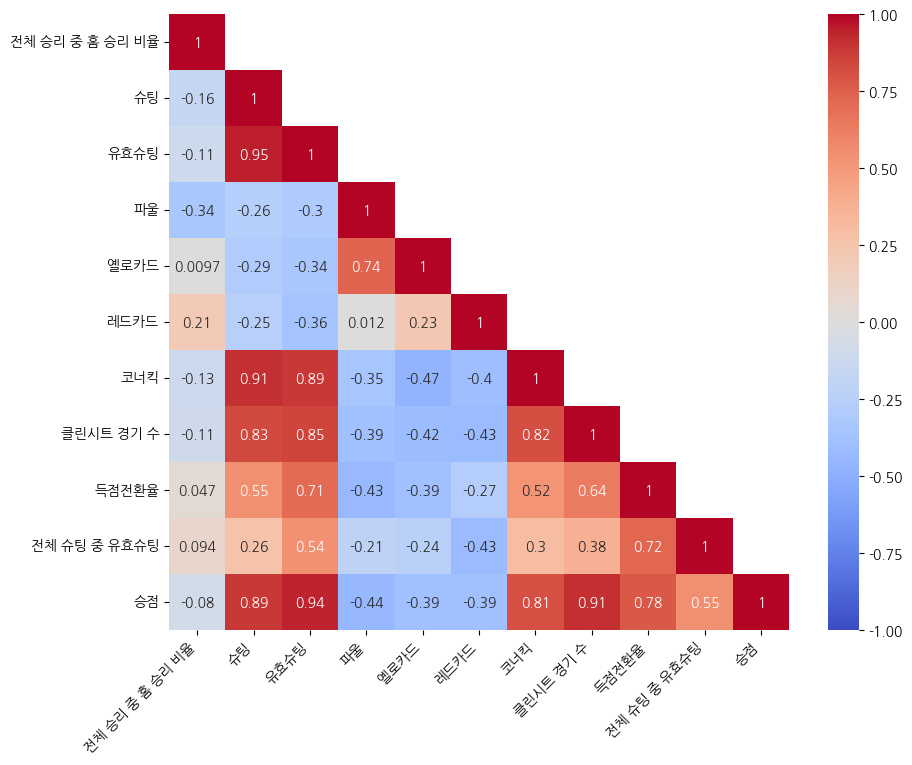

In [106]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(data = temp_teams_small,
            cmap = 'coolwarm',
            vmin = -1, vmax = 1,
            mask = mask,
            annot = True)
#plt.title('Correlation between index', size = 18)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.show()

### p-value 확인

In [107]:
# p-value
from scipy.stats import pearsonr

for col in teams_small.columns:
    if col != 'points' and col != 'team':
        r = pearsonr(teams_small[col], teams_small['points'])[0]
        p = pearsonr(teams_small[col], teams_small['points'])[1]
        result = '기각' if p > 0.05 else '수용⭐️'
        print(f'points와 {col} 사이의 상관계수: {round(r, 3)}, p-value: {p}, 결과: {result}')


points와 home win/total win 사이의 상관계수: -0.08, p-value: 0.7388204708826459, 결과: 기각
points와 Shots 사이의 상관계수: 0.886, p-value: 1.9841949342310615e-07, 결과: 수용⭐️
points와 Shot on Target 사이의 상관계수: 0.944, p-value: 4.3736105388383776e-10, 결과: 수용⭐️
points와 Foul 사이의 상관계수: -0.44, p-value: 0.051937891793583275, 결과: 기각
points와 Yellow card 사이의 상관계수: -0.389, p-value: 0.09021026595025734, 결과: 기각
points와 Red card 사이의 상관계수: -0.386, p-value: 0.09298335083845123, 결과: 기각
points와 Corner Kick 사이의 상관계수: 0.807, p-value: 1.731775186097154e-05, 결과: 수용⭐️
points와 clean sheet 사이의 상관계수: 0.907, p-value: 3.638584649528805e-08, 결과: 수용⭐️
points와 ConvRate(%) 사이의 상관계수: 0.777, p-value: 5.492103390250597e-05, 결과: 수용⭐️
points와 SoT/Total shot(%) 사이의 상관계수: 0.548, p-value: 0.01228427835402576, 결과: 수용⭐️


In [108]:
pearsonr(teams_small['Shots'], teams_small['points'])[1]

1.9841949342310615e-07

In [109]:
pearsonr(teams_small['Shot on Target'], teams_small['points'])[1]

4.3736105388383776e-10

In [110]:
pearsonr(teams_small['Corner Kick'], teams_small['points'])[1]

1.731775186097154e-05

In [111]:
pearsonr(teams_small['clean sheet'], teams_small['points'])[1]

3.638584649528805e-08

In [112]:
pearsonr(teams_small['ConvRate(%)'], teams_small['points'])[1]

5.492103390250597e-05

In [113]:
pearsonr(teams_small['SoT/Total shot(%)'], teams_small['points'])[1]

0.01228427835402576

# 5. 팀 별 지표 살펴보기

### 리즈 유나이티드 데이터의 지표 확인

In [114]:
teams.head()

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals,lose_points,clean sheet,ConvRate(%),SoT/Total shot(%)
0,Brentford,16,32,46,7,9,6,9,13,18,16,15,0.54,442,154,371,61,3,159,48,56,9,31.17,34.84
1,Man United,22,35,58,10,4,6,8,16,12,14,14,0.62,508,187,395,75,2,199,57,57,8,30.48,36.81
2,Burnley,17,17,35,5,8,2,9,7,17,13,11,0.71,407,125,394,68,2,184,34,53,9,27.20,30.71
3,Chelsea,34,42,74,9,3,12,3,21,6,12,15,0.43,592,211,409,63,1,242,76,33,16,36.02,35.64
4,Everton,16,27,39,9,8,2,13,11,21,17,15,0.82,438,138,368,76,6,161,43,66,8,31.16,31.51


In [115]:
leeds_highlight = teams.copy()
leeds_highlight['leeds'] = 0
leeds_highlight.loc[leeds_highlight['team'] == 'Leeds', 'leeds'] = 1

In [116]:
leeds_highlight.head()

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals,lose_points,clean sheet,ConvRate(%),SoT/Total shot(%),leeds
0,Brentford,16,32,46,7,9,6,9,13,18,16,15,0.54,442,154,371,61,3,159,48,56,9,31.17,34.84,0
1,Man United,22,35,58,10,4,6,8,16,12,14,14,0.62,508,187,395,75,2,199,57,57,8,30.48,36.81,0
2,Burnley,17,17,35,5,8,2,9,7,17,13,11,0.71,407,125,394,68,2,184,34,53,9,27.20,30.71,0
3,Chelsea,34,42,74,9,3,12,3,21,6,12,15,0.43,592,211,409,63,1,242,76,33,16,36.02,35.64,0
4,Everton,16,27,39,9,8,2,13,11,21,17,15,0.82,438,138,368,76,6,161,43,66,8,31.16,31.51,0


In [117]:
### 토트넘 정보 추가하기 ###
leeds_highlight.loc[leeds_highlight['team'] == 'Tottenham', 'leeds'] = 2
leeds_highlight['leeds']

,leeds
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,2


In [118]:
leeds_highlight.iloc[[9, 13]]

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals,lose_points,clean sheet,ConvRate(%),SoT/Total shot(%),leeds
9,Tottenham,33,36,71,13,5,9,6,22,11,18,15,0.59,491,198,386,67,1,195,69,40,16,34.85,40.33,2
13,Leeds,16,26,38,4,9,5,9,9,18,13,14,0.44,485,154,469,100,3,171,42,79,5,27.27,31.75,1


In [119]:
leeds_highlight['total goals'].mean()

53.55

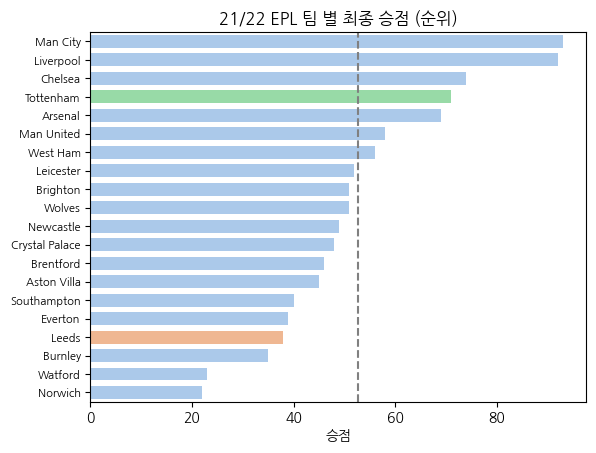

In [121]:
# 최종 리그 순위 (승점)
sns.barplot(x = 'points',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('points', ascending = False))

plt.axvline(leeds_highlight['points'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 최종 승점 (순위)')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('승점')
plt.show()

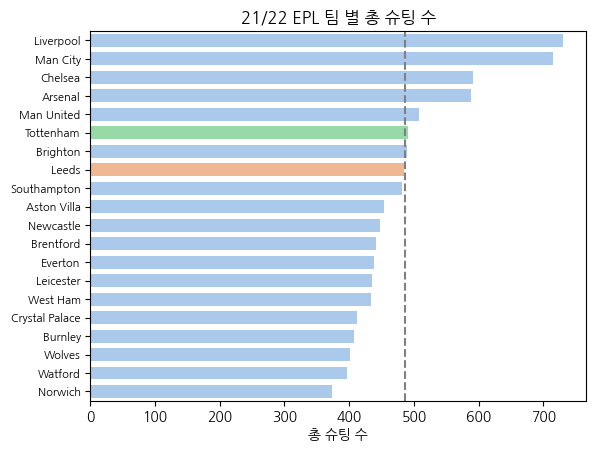

In [122]:
# 슈팅
sns.barplot(x = 'Shots',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('Shots', ascending = False))

plt.axvline(leeds_highlight['Shots'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 총 슈팅 수')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('총 슈팅 수')
plt.show()

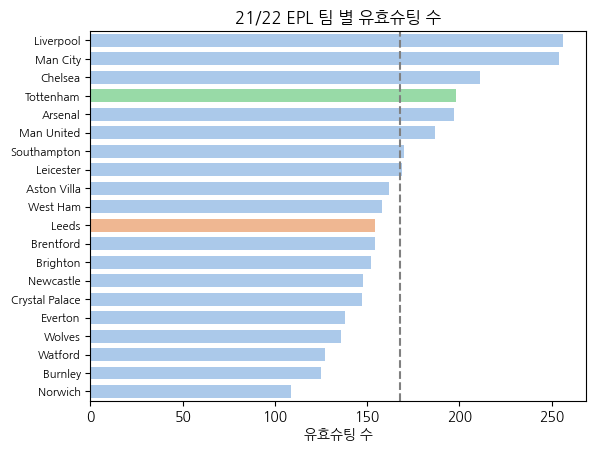

In [123]:
# 유효 슈팅
sns.barplot(x = 'Shot on Target',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('Shot on Target', ascending = False))

plt.axvline(leeds_highlight['Shot on Target'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 유효슈팅 수')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('유효슈팅 수')
plt.show()

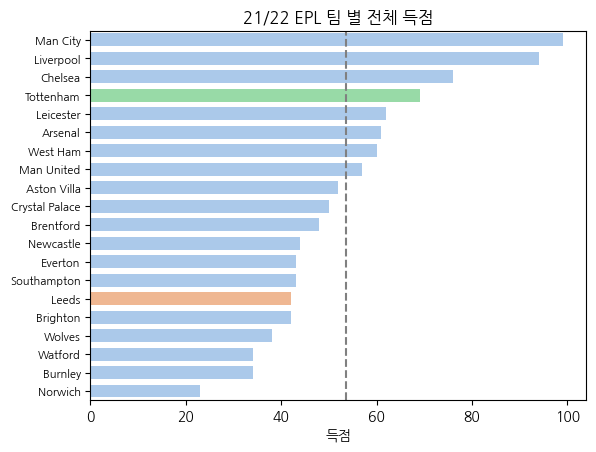

In [124]:
# 득점
sns.barplot(x = 'total goals',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('total goals', ascending = False))

plt.axvline(leeds_highlight['total goals'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 전체 득점')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('득점')
plt.show()

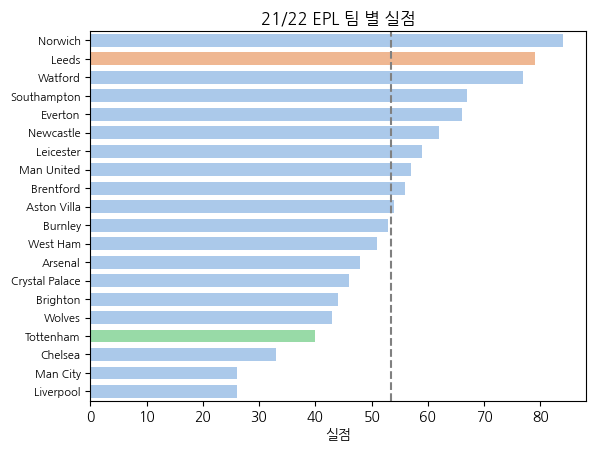

In [125]:
# 실점
sns.barplot(x = 'lose_points',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('lose_points', ascending = False))

plt.axvline(leeds_highlight['lose_points'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 실점')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('실점')
plt.show()

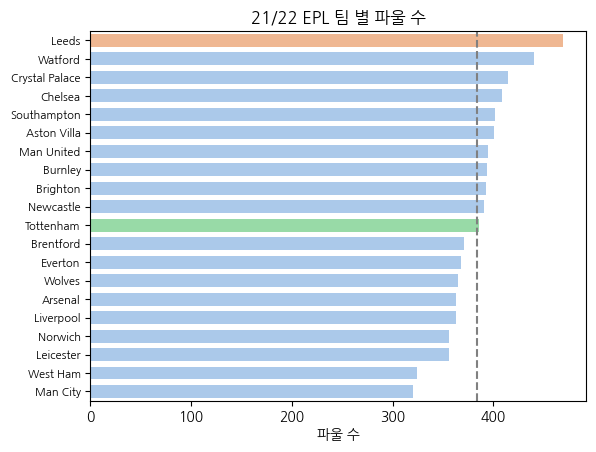

In [126]:
# 파울
sns.barplot(x = 'Foul',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('Foul', ascending = False))

plt.axvline(leeds_highlight['Foul'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 파울 수')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('파울 수')
plt.show()

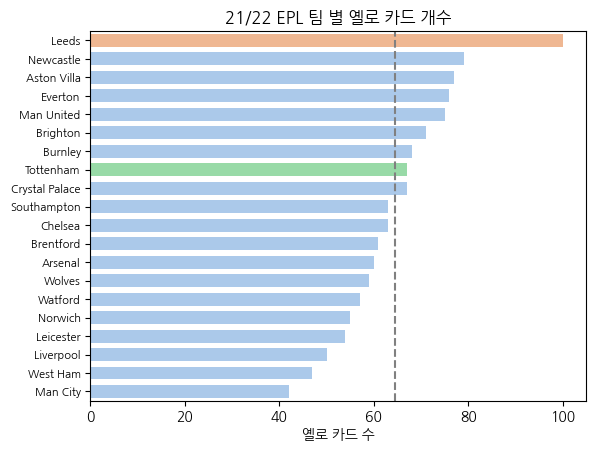

In [127]:
# 옐로 카드
sns.barplot(x = 'Yellow card',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('Yellow card', ascending = False))

plt.axvline(leeds_highlight['Yellow card'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 옐로 카드 개수')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('옐로 카드 수')
plt.show()

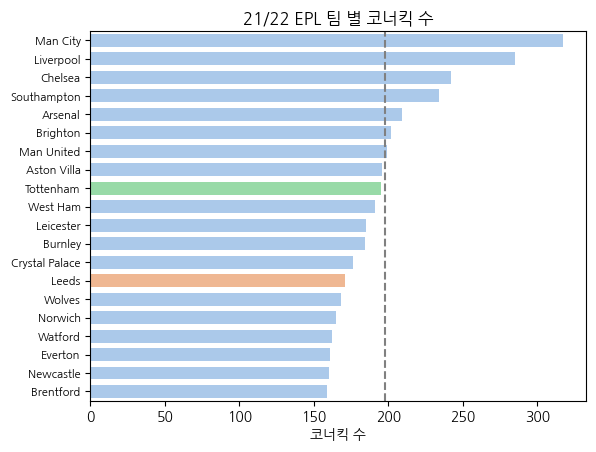

In [128]:
# 코너킥
sns.barplot(x = 'Corner Kick',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('Corner Kick', ascending = False))

plt.axvline(leeds_highlight['Corner Kick'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 코너킥 수')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('코너킥 수')
plt.show()

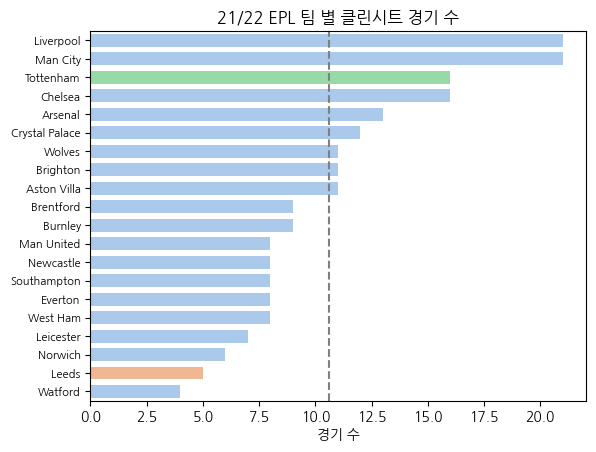

In [129]:
# 클린시트 경기 수
sns.barplot(x = 'clean sheet',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('clean sheet', ascending = False))

plt.axvline(leeds_highlight['clean sheet'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 클린시트 경기 수')
plt.yticks(fontsize=8)
plt.xlabel('경기 수')
plt.ylabel('')
plt.show()

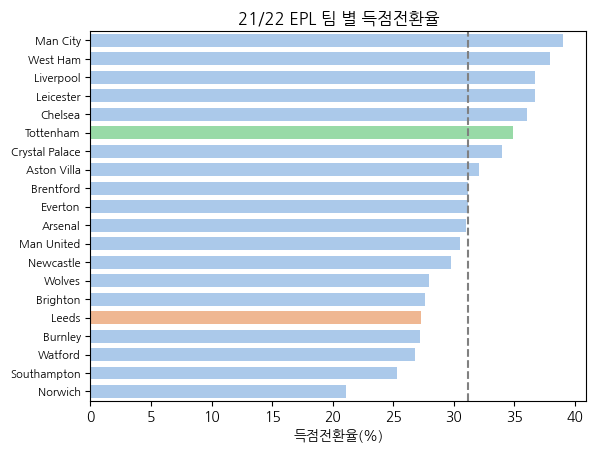

In [130]:
# 득점전환율
sns.barplot(x = 'ConvRate(%)',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('ConvRate(%)', ascending = False))

plt.axvline(leeds_highlight['ConvRate(%)'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 득점전환율')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('득점전환율(%)')
plt.show()

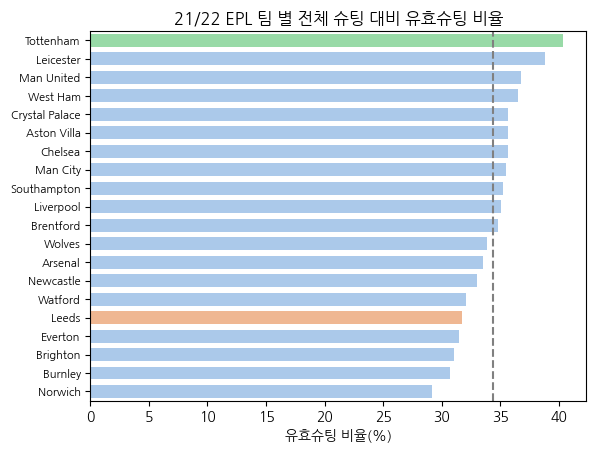

In [131]:
# 유효슈팅 비율
sns.barplot(x = 'SoT/Total shot(%)',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('SoT/Total shot(%)', ascending = False))

plt.axvline(leeds_highlight['SoT/Total shot(%)'].mean(), color = 'gray', linestyle = '--', linewidth = 1.5)
plt.title('21/22 EPL 팀 별 전체 슈팅 대비 유효슈팅 비율')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('유효슈팅 비율(%)')
plt.show()

# 6. 득점 - 실점 비교

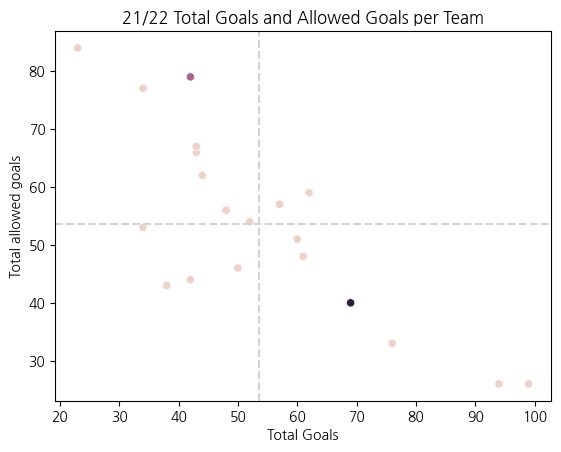

In [132]:
sns.scatterplot(x = 'total goals',
                y = 'lose_points',
                hue = 'leeds',
                legend = False,
                data = leeds_highlight)
plt.xlabel('Total Goals')
plt.ylabel('Total allowed goals')
plt.title('21/22 Total Goals and Allowed Goals per Team')
plt.axvline(leeds_highlight['total goals'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.axhline(leeds_highlight['lose_points'].mean(), color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.show()

### 득실 차

In [133]:
leeds_highlight.head()

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals,lose_points,clean sheet,ConvRate(%),SoT/Total shot(%),leeds
0,Brentford,16,32,46,7,9,6,9,13,18,16,15,0.54,442,154,371,61,3,159,48,56,9,31.17,34.84,0
1,Man United,22,35,58,10,4,6,8,16,12,14,14,0.62,508,187,395,75,2,199,57,57,8,30.48,36.81,0
2,Burnley,17,17,35,5,8,2,9,7,17,13,11,0.71,407,125,394,68,2,184,34,53,9,27.20,30.71,0
3,Chelsea,34,42,74,9,3,12,3,21,6,12,15,0.43,592,211,409,63,1,242,76,33,16,36.02,35.64,0
4,Everton,16,27,39,9,8,2,13,11,21,17,15,0.82,438,138,368,76,6,161,43,66,8,31.16,31.51,0


In [134]:
leeds_highlight['gain-loss'] = leeds_highlight['total goals'] - leeds_highlight['lose_points']
leeds_highlight.head()

,team,first_half,second_half,points,home win,home lose,away win,away lose,total win,total lose,total home,total away,home win/total win,Shots,Shot on Target,Foul,Yellow card,Red card,Corner Kick,total goals,lose_points,clean sheet,ConvRate(%),SoT/Total shot(%),leeds,gain-loss
0,Brentford,16,32,46,7,9,6,9,13,18,16,15,0.54,442,154,371,61,3,159,48,56,9,31.17,34.84,0,-8
1,Man United,22,35,58,10,4,6,8,16,12,14,14,0.62,508,187,395,75,2,199,57,57,8,30.48,36.81,0,0
2,Burnley,17,17,35,5,8,2,9,7,17,13,11,0.71,407,125,394,68,2,184,34,53,9,27.20,30.71,0,-19
3,Chelsea,34,42,74,9,3,12,3,21,6,12,15,0.43,592,211,409,63,1,242,76,33,16,36.02,35.64,0,43
4,Everton,16,27,39,9,8,2,13,11,21,17,15,0.82,438,138,368,76,6,161,43,66,8,31.16,31.51,0,-23


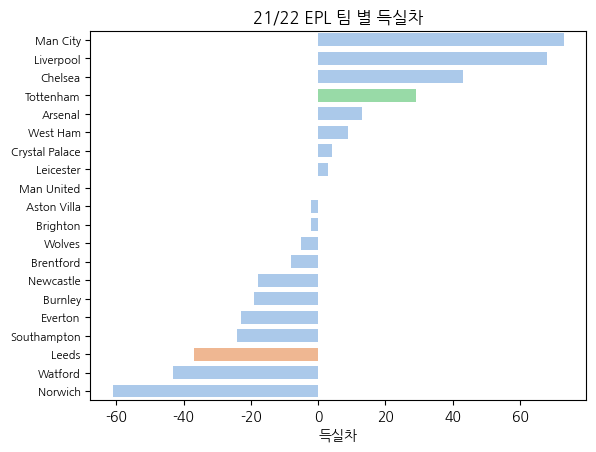

In [135]:
sns.barplot(x = 'gain-loss',
            y = 'team',
            width = 0.7,
            hue = 'leeds',
            palette = 'pastel',
            legend = False,
            data = leeds_highlight.sort_values('gain-loss', ascending = False))
plt.title('21/22 EPL 팀 별 득실차')
plt.yticks(fontsize=8)
plt.ylabel('')
plt.xlabel('득실차')
plt.show()

# 7. 리즈 시즌별 순위

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
years = [i for i in range(2000, 2024)]

In [138]:
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

In [139]:
league = [1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, ]
print(len(years), len(league))

24 24


In [140]:
rank = [4, 5, 15, 19, 14, 5, 24, 5, 4, 2, 7, 14, 13, 15, 15, 13, 7, 13, 3, 1, 9, 17, 19, 3]
print(len(rank))

24


In [141]:
leeds = pd.DataFrame({
    'year' : years,
    'rank' : rank,
    'league': league
})

In [142]:
leeds['final_rank'] = (leeds['league'] - 1) * 20 + rank
new_leeds = leeds.iloc[4:, :]

In [143]:
leeds

,year,rank,league,final_rank
0,2000,4,1,4
1,2001,5,1,5
2,2002,15,1,15
3,2003,19,1,19
4,2004,14,2,34
5,2005,5,2,25
6,2006,24,2,44
7,2007,5,3,45
8,2008,4,3,44
9,2009,2,3,42


In [144]:
new_leeds

,year,rank,league,final_rank
4,2004,14,2,34
5,2005,5,2,25
6,2006,24,2,44
7,2007,5,3,45
8,2008,4,3,44
9,2009,2,3,42
10,2010,7,2,27
11,2011,14,2,34
12,2012,13,2,33
13,2013,15,2,35


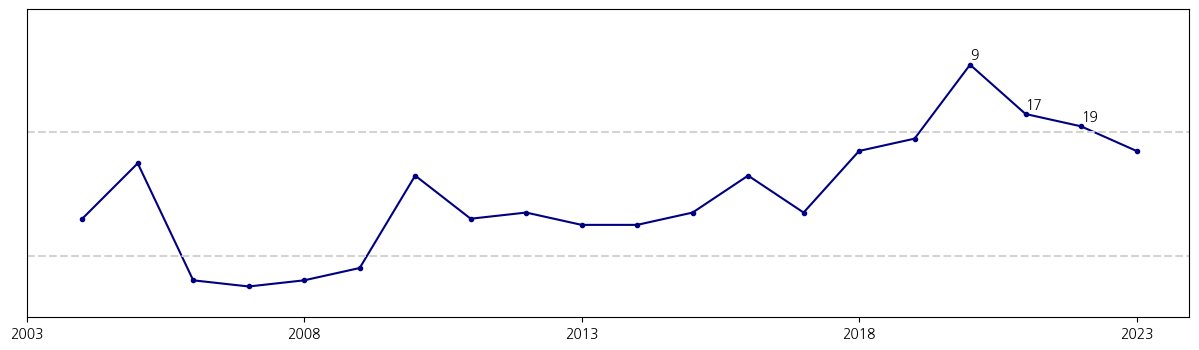

In [145]:
plt.figure(figsize = (15, 4))
plt.plot(new_leeds['year'], new_leeds['final_rank'], marker = '.', color = 'navy')
plt.ylim(50, 0)
plt.axhline(20, color = 'lightgray', linestyle = '--', linewidth = 1.5)
plt.axhline(40, color = 'lightgray', linestyle = '--', linewidth = 1.5)

plt.xticks([i for i in range(2003, 2024, 5)])

for x, y, rank in zip(new_leeds['year'], new_leeds['final_rank'], new_leeds['final_rank']):
    if rank < 20:
        plt.text(
            x, y-1, rank,
            fontsize=10,
            ha='left'
        )

ax = plt.gca()
ax.axes.yaxis.set_visible(False)
#ax.axes.xaxis.set_visible(False)

# 8. 심판 데이터 분석

In [146]:
df.head()

,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,H,M Oliver,8,22,3,4,12,8,2,5,0,0,0,0
1,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,H,P Tierney,16,10,8,3,11,9,5,4,1,2,0,0
2,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,H,D Coote,14,14,3,8,10,7,7,6,2,1,0,0
3,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,H,J Moss,13,4,6,1,15,11,5,2,0,0,0,0
4,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,A,A Madley,14,6,6,3,13,15,6,8,2,0,0,0


In [147]:
df['Referee'].unique()

array(['M Oliver', 'P Tierney', 'D Coote', 'J Moss', 'A Madley',
       'C Pawson', 'M Dean', 'A Marriner', 'M Atkinson', 'A Taylor',
       'D England', 'G Scott', 'S Attwell', 'P Bankes', 'R Jones',
       'K Friend', 'C Kavanagh', 'J Gillett', 'S Hooper', 'M Salisbury',
       'J Brooks', 'T Harrington'], dtype=object)

In [148]:
len(df['Referee'].unique())

22

In [149]:
refs = list(df['Referee'].unique())
refs

['M Oliver',
 'P Tierney',
 'D Coote',
 'J Moss',
 'A Madley',
 'C Pawson',
 'M Dean',
 'A Marriner',
 'M Atkinson',
 'A Taylor',
 'D England',
 'G Scott',
 'S Attwell',
 'P Bankes',
 'R Jones',
 'K Friend',
 'C Kavanagh',
 'J Gillett',
 'S Hooper',
 'M Salisbury',
 'J Brooks',
 'T Harrington']

In [150]:
ref_dict = {ref: [0, 0, 0, 0, 0, 0, 0] for ref in refs} # 출장 수, 홈 파울, 원정 파울, 홈 옐카, 원정 옐카, 홈 레드, 원정 레드

In [151]:
def ref_check(df, dict):
    for index in df.index:
        ref = df.loc[index, 'Referee']
        dict[ref][0] += 1
        dict[ref][1] += df.loc[index, 'HF']
        dict[ref][2] += df.loc[index, 'AF']
        dict[ref][3] += df.loc[index, 'HY']
        dict[ref][4] += df.loc[index, 'AY']
        dict[ref][5] += df.loc[index, 'HR']
        dict[ref][6] += df.loc[index, 'AR']

In [152]:
ref_check(df, ref_dict)
ref_dict

{'M Oliver': [26, 257, 294, 36, 37, 3, 4],
 'P Tierney': [27, 276, 307, 54, 49, 1, 4],
 'D Coote': [20, 221, 255, 43, 47, 1, 1],
 'J Moss': [25, 223, 225, 29, 29, 0, 4],
 'A Madley': [16, 186, 189, 16, 20, 0, 2],
 'C Pawson': [26, 310, 266, 51, 56, 2, 0],
 'M Dean': [26, 249, 252, 43, 39, 2, 0],
 'A Marriner': [19, 180, 185, 27, 34, 2, 0],
 'M Atkinson': [26, 182, 224, 32, 32, 0, 2],
 'A Taylor': [28, 287, 261, 50, 51, 3, 2],
 'D England': [15, 147, 162, 25, 33, 0, 1],
 'G Scott': [12, 133, 129, 21, 18, 0, 1],
 'S Attwell': [20, 195, 169, 33, 37, 1, 0],
 'P Bankes': [12, 119, 131, 25, 29, 0, 1],
 'R Jones': [12, 130, 117, 14, 19, 0, 0],
 'K Friend': [18, 180, 172, 41, 36, 1, 1],
 'C Kavanagh': [18, 170, 191, 30, 38, 2, 1],
 'J Gillett': [9, 94, 77, 14, 17, 1, 0],
 'S Hooper': [15, 174, 147, 25, 21, 0, 0],
 'M Salisbury': [3, 37, 33, 5, 7, 0, 0],
 'J Brooks': [4, 43, 38, 11, 10, 0, 0],
 'T Harrington': [3, 28, 36, 3, 4, 0, 0]}

In [153]:
# 데이터프레임 만들기
df_ref = pd.DataFrame({
    'name': refs,
    'appear': [v[0] for v in ref_dict.values()],
    'home_foul': [v[1] for v in ref_dict.values()],
    'away_foul': [v[2] for v in ref_dict.values()],
    'home_yellow': [v[3] for v in ref_dict.values()],
    'away_yellow': [v[4] for v in ref_dict.values()],
    'home_red': [v[5] for v in ref_dict.values()],
    'away_red': [v[6] for v in ref_dict.values()],
})

df_ref

,name,appear,home_foul,away_foul,home_yellow,away_yellow,home_red,away_red
0,M Oliver,26,257,294,36,37,3,4
1,P Tierney,27,276,307,54,49,1,4
2,D Coote,20,221,255,43,47,1,1
3,J Moss,25,223,225,29,29,0,4
4,A Madley,16,186,189,16,20,0,2
5,C Pawson,26,310,266,51,56,2,0
6,M Dean,26,249,252,43,39,2,0
7,A Marriner,19,180,185,27,34,2,0
8,M Atkinson,26,182,224,32,32,0,2
9,A Taylor,28,287,261,50,51,3,2


In [154]:
df_ref['total_foul'] = df_ref['home_foul'] + df_ref['away_foul']
df_ref['total_yellow'] = df_ref['home_yellow'] + df_ref['away_yellow']
df_ref['total_red'] = df_ref['home_red'] + df_ref['away_red']
df_ref['avg_foul'] = df_ref['total_foul'] / df_ref['appear']
df_ref['avg_card'] = (df_ref['total_yellow'] +  df_ref['total_red'])/ df_ref['appear']
df_ref['foul/card'] = df_ref['total_foul'] / (df_ref['total_yellow'] +  df_ref['total_red'])

In [155]:
df_ref

,name,appear,home_foul,away_foul,home_yellow,away_yellow,home_red,away_red,total_foul,total_yellow,total_red,avg_foul,avg_card,foul/card
0,M Oliver,26,257,294,36,37,3,4,551,73,7,21.192308,3.076923,6.887500
1,P Tierney,27,276,307,54,49,1,4,583,103,5,21.592593,4.000000,5.398148
2,D Coote,20,221,255,43,47,1,1,476,90,2,23.800000,4.600000,5.173913
3,J Moss,25,223,225,29,29,0,4,448,58,4,17.920000,2.480000,7.225806
4,A Madley,16,186,189,16,20,0,2,375,36,2,23.437500,2.375000,9.868421
5,C Pawson,26,310,266,51,56,2,0,576,107,2,22.153846,4.192308,5.284404
6,M Dean,26,249,252,43,39,2,0,501,82,2,19.269231,3.230769,5.964286
7,A Marriner,19,180,185,27,34,2,0,365,61,2,19.210526,3.315789,5.793651
8,M Atkinson,26,182,224,32,32,0,2,406,64,2,15.615385,2.538462,6.151515
9,A Taylor,28,287,261,50,51,3,2,548,101,5,19.571429,3.785714,5.169811


<Axes: ylabel='appear'>

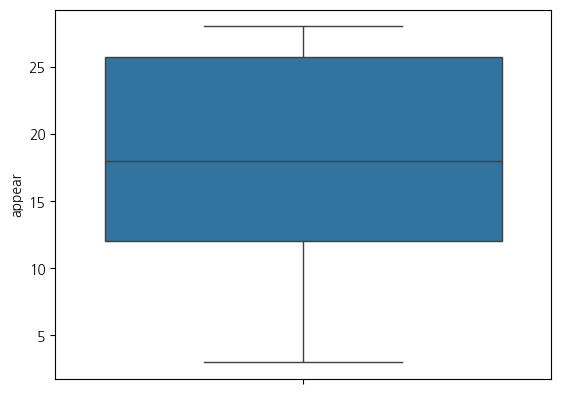

In [163]:
sns.boxplot(df_ref['appear'])

(array([3., 0., 1., 3., 2., 1., 5., 0., 1., 6.]),
 array([ 3. ,  5.5,  8. , 10.5, 13. , 15.5, 18. , 20.5, 23. , 25.5, 28. ]),
 <BarContainer object of 10 artists>)

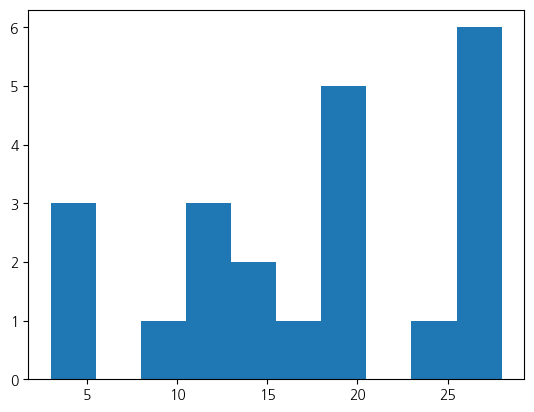

In [164]:
plt.hist(df_ref['appear'])

In [165]:
# 경기 수 5 미만인 심판은 제외
df_ref[df_ref['appear'] < 5]

,name,appear,home_foul,away_foul,home_yellow,away_yellow,home_red,away_red,total_foul,total_yellow,total_red,avg_foul,avg_card,foul/card
19,M Salisbury,3,37,33,5,7,0,0,70,12,0,23.333333,4.000000,5.833333
20,J Brooks,4,43,38,11,10,0,0,81,21,0,20.250000,5.250000,3.857143
21,T Harrington,3,28,36,3,4,0,0,64,7,0,21.333333,2.333333,9.142857


In [168]:
df_ref.loc[df_ref['appear'] < 5, 'appear'] = None
df_ref.dropna(inplace = True)
df_ref

,name,appear,home_foul,away_foul,home_yellow,away_yellow,home_red,away_red,total_foul,total_yellow,total_red,avg_foul,avg_card,foul/card
0,M Oliver,26.0,257,294,36,37,3,4,551,73,7,21.192308,3.076923,6.887500
1,P Tierney,27.0,276,307,54,49,1,4,583,103,5,21.592593,4.000000,5.398148
2,D Coote,20.0,221,255,43,47,1,1,476,90,2,23.800000,4.600000,5.173913
3,J Moss,25.0,223,225,29,29,0,4,448,58,4,17.920000,2.480000,7.225806
4,A Madley,16.0,186,189,16,20,0,2,375,36,2,23.437500,2.375000,9.868421
5,C Pawson,26.0,310,266,51,56,2,0,576,107,2,22.153846,4.192308,5.284404
6,M Dean,26.0,249,252,43,39,2,0,501,82,2,19.269231,3.230769,5.964286
7,A Marriner,19.0,180,185,27,34,2,0,365,61,2,19.210526,3.315789,5.793651
8,M Atkinson,26.0,182,224,32,32,0,2,406,64,2,15.615385,2.538462,6.151515
9,A Taylor,28.0,287,261,50,51,3,2,548,101,5,19.571429,3.785714,5.169811


In [169]:
df_ref['appear'].sum()

370.0

In [173]:
# 평균 카드, 파울 수 둘 다 평균 이상인 심판 목록
f_mean = df_ref['avg_foul'].mean()
c_mean = df_ref['avg_card'].mean()
cond = (df_ref['avg_foul'] >= f_mean) & (df_ref['avg_card'] >= c_mean)
df_ref.loc[cond, 'name']

,name
1,P Tierney
2,D Coote
5,C Pawson
10,D England
13,P Bankes


In [175]:
# 위 내용 컬럼에 추가 -
df_ref['more'] = 0
df_ref.loc[cond, 'more'] = 1

,more
0,0
1,1
2,1
3,0
4,0
5,1
6,0
7,0
8,0
9,0


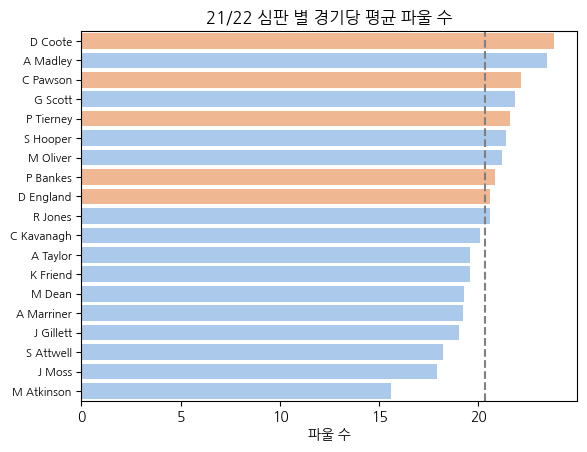

In [181]:
# 경기당 평균 파울 수
sns.barplot(x = 'avg_foul',
            y = 'name',
            palette = 'pastel',
            hue = 'more',
            legend = False,
            data = df_ref.sort_values('avg_foul', ascending = False))
plt.title('21/22 심판 별 경기당 평균 파울 수')
plt.axvline(df_ref['avg_foul'].mean(), linestyle = '--', color = 'gray')
plt.ylabel('')
plt.xlabel('파울 수')
plt.yticks(fontsize = 8)
plt.show()

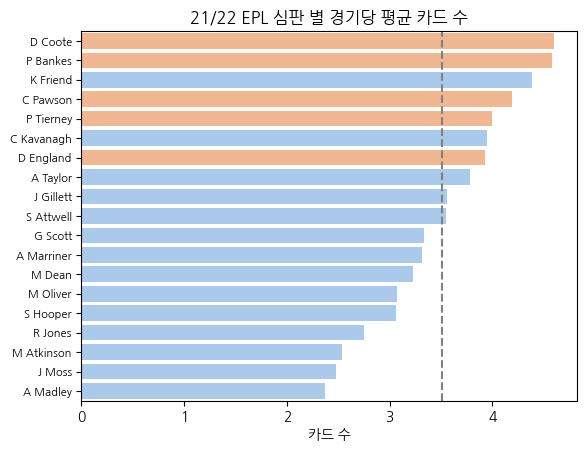

In [182]:
# 경기당 평균 옐로 카드 수
sns.barplot(x = 'avg_card',
            y = 'name',
            palette = 'pastel',
            hue = 'more',
            legend = False,
            data = df_ref.sort_values('avg_card', ascending = False))
plt.title('21/22 EPL 심판 별 경기당 평균 카드 수')
plt.axvline(df_ref['avg_card'].mean(), linestyle = '--', color = 'gray')
plt.ylabel('')
plt.xlabel('카드 수')
plt.yticks(fontsize = 8)
plt.show()

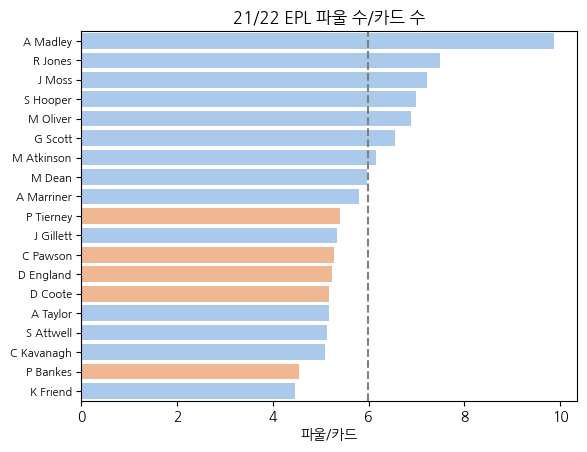

In [187]:
# 파울/카드 -> 파울 몇 개에 카드 하나?
sns.barplot(x = 'foul/card',
            y = 'name',
            hue = 'more',
            palette = 'pastel',
            legend = False,
            data = df_ref.sort_values('foul/card', ascending = False))
plt.title('21/22 EPL 파울 수/카드 수')
plt.axvline(df_ref['foul/card'].mean(), linestyle = '--', color = 'gray')
plt.ylabel('')
plt.xlabel('파울/카드')
plt.yticks(fontsize = 8)
plt.show()